In [1]:
import pandas as pd
import os
import pickle
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
#import seaborn as sns
import math 

from sklearn.utils import safe_sqr
from sklearn.base import clone
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# import GEOparse
# import re

#Feature Select
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV, RFE
#from boruta import BorutaPy

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.linear_model import LassoCV, Lasso

from sklearn.metrics import r2_score
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.impute import KNNImputer
from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesRegressor
import collections
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.impute import KNNImputer
import glob

# Ranking Variance

In [ ]:
f_dict = {}
directory = '/cellar/users/zkoch/cs_clock_proj/blueprint_data/processed_data/only_gene_bodies_flattened_partitioned/'
# read in each flattened data file and combine them 
for filename in os.listdir(directory):
    cur_file = pd.read_csv(directory + filename, sep='\t', skiprows=0, na_filter=False, low_memory=False)
    cur_file = cur_file.set_index('Unnamed: 0')
    print(cur_file)
    test_list = []
    for i in cur_file.columns:
        test_list.append(i)
    
    for (columnName, columnData) in cur_file[test_list].iteritems():
        f_dict[columnName] = np.var(columnData.values)
        
with open('ranked_variance.pkl', 'wb') as f:
        pickle.dump(f_dict, f, pickle.HIGHEST_PROTOCOL)

### Creating Top 1% Dataset

In [46]:
df = pd.DataFrame()
directory = '/cellar/users/zkoch/cs_clock_proj/blueprint_data/processed_data/only_gene_bodies_flattened_partitioned/'
for filename in os.listdir(directory):
    cur_file = pd.read_csv(directory + filename, sep='\t', skiprows=0, na_filter=False, low_memory=False)
    cur_file = cur_file.set_index('Unnamed: 0')
    cur_df = cur_file[set(cur_file.columns) & set(t_df[0:int(0.01*len(t_df))]['Chr:Win:State'])]
    
    df = df.merge(cur_df, how='outer', left_index=True, right_index=True)
    
df.to_csv('top1%_dataset.csv')

In [51]:
age_file = pd.read_csv('/cellar/users/zkoch/cs_clock_proj/blueprint_data/all_samples_age_pairs_transformed.tsv', sep='\t')
age_file = age_file.set_index('SAMPLE_NAME')
age_file = age_file.rename(columns={'DONOR_AGE': 'Transformed Age'})
final = df.merge(age_file, how='outer', left_index=True, right_index=True)

In [74]:

age_file = pd.read_csv('/cellar/users/zkoch/cs_clock_proj/blueprint_data/all_samples_age_pairs.tsv', sep='\t')
age_file = age_file.set_index('SAMPLE_NAME')
# age_file = age_file.rename(columns={'DONOR_AGE': 'Transformed Age'})
final = df.merge(age_file, how='outer', left_index=True, right_index=True)

In [76]:
final = final.dropna()
final

,chr15_146337_E3,chr15_203314_E5,chr15_204515_E10,chr15_213434_E3,chr15_147853_E1,chr15_201030_E3,chr15_213453_E3,chr15_114363_E5,chr15_199000_E3,chr15_209187_E5,...,chr1_822797_E1,chr1_892369_E3,chr1_869507_E3,chr1_847750_E3,chr1_915642_E3,chr1_916218_E3,chr1_838866_E3,chr1_822797_E11,chr1_915120_E1,DONOR_AGE
C000S5H1,0.9791,0.6646,0.9997,0.9989,0.9993,0.0000,0.9989,0.0001,0.0003,0.1984,...,1.0000,0.9987,0.0000,0.0000,0.9959,0.0,0.9965,0.0000,1.0000,65
C000S5H2,0.0000,0.9996,0.9996,0.9989,0.9969,0.0000,0.9989,0.9993,0.0000,0.9989,...,0.9993,0.9931,0.0603,0.0000,0.9989,0.0,0.0003,0.0007,1.0000,65
C0010KH2,0.9790,0.0018,0.9987,0.9987,0.9713,0.0003,0.9988,0.0001,0.9988,0.0005,...,0.3119,0.9988,0.6360,0.0000,0.9973,0.0,0.7799,0.0000,1.0000,60
C0011IH2,0.9725,0.7201,0.9989,0.9989,0.9843,0.0003,0.9989,0.0001,0.0061,0.9427,...,0.6424,0.9898,0.0000,0.0000,0.9955,0.0,0.9966,0.0000,1.0000,50
C00184H2,0.9824,0.7142,0.9989,0.9989,0.0841,0.0000,0.9989,0.0001,0.7738,0.0443,...,0.7132,0.9988,0.0002,0.0000,0.0001,0.0,0.9650,0.0000,0.9876,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S01F8KH2,0.7770,0.0000,0.0774,0.8260,0.0297,0.9988,0.9859,0.9982,0.0009,0.0758,...,0.0021,0.0000,0.9987,0.9989,0.0000,0.0,0.0000,0.9946,0.0001,65
S01FW9H2,0.9615,0.0000,0.9496,0.9355,0.0408,0.9989,0.9941,0.9977,0.9296,0.0056,...,0.0462,0.0000,0.9984,0.9989,0.0000,0.0,0.0000,0.9528,0.0000,60
S01GKTH1,0.0000,0.9993,0.9997,0.9989,0.3328,0.0000,0.9989,0.9996,0.0000,0.9996,...,1.0000,0.9903,0.7751,0.0000,0.9988,0.0,0.0003,0.0000,1.0000,55
S01GMPH1,0.0000,0.0194,0.0885,0.9989,0.1395,0.0000,0.9989,0.9996,0.0000,0.9655,...,0.5907,0.0000,0.9000,0.9242,0.0000,0.0,0.0000,0.4091,0.0000,55


In [82]:
score_list = []

X = final.values
X_df = final.drop(['DONOR_AGE'], axis = 1)
y = final['DONOR_AGE']

cv = KFold(n_splits = 10, shuffle = True, random_state = 99)

for train_indices, test_indices in cv.split(X):
    X_train = X_df.iloc[train_indices, :]
    X_test = X_df.iloc[test_indices, :]
    y_train, y_test = y[train_indices], y[test_indices]
    
    model = ElasticNet()
    model.fit(X_train.to_numpy(), y_train)
    
    y_pred = model.predict(X_test.to_numpy())
    acc =  (np.corrcoef(y_test, y_pred)[1][0])**2
    score_list.append(acc)

    coef = pd.Series(model.coef_, index = X_train.columns)
    print("Elastic Net picked " + str(sum(coef != 0)) 
          + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables for a score of "+ str(acc))
    
print(mean(score_list))

Elastic Net picked 865 variables and eliminated the other 59668 variables for a score of 0.582493849659638
Elastic Net picked 924 variables and eliminated the other 59609 variables for a score of 0.9157984389700358
Elastic Net picked 810 variables and eliminated the other 59723 variables for a score of 0.2508240057710502
Elastic Net picked 887 variables and eliminated the other 59646 variables for a score of 0.8498093046910647
Elastic Net picked 841 variables and eliminated the other 59692 variables for a score of 0.7824297732125829
Elastic Net picked 908 variables and eliminated the other 59625 variables for a score of 0.7070840589327364
Elastic Net picked 881 variables and eliminated the other 59652 variables for a score of 0.8290816140370906
Elastic Net picked 882 variables and eliminated the other 59651 variables for a score of 0.8844038745398864
Elastic Net picked 917 variables and eliminated the other 59616 variables for a score of 0.5327564140264811
Elastic Net picked 888 variab

In [79]:
y_pred

array([46.71371786, 41.10824804, 23.83763816, 38.36341665, 24.15961146,
       41.68367183,  0.7010007 , 51.69135132, 64.95501381, 59.69431394,
       49.20309611, 60.93569268, 63.93959442, 45.07793708, 46.90148513,
       68.27425486, 49.34042445, 47.07541065, 41.34223452, 25.18465194])

In [80]:
y_test

C000S5H2    65
C0010KH2    60
C003UQH1    65
S001MJH1    55
S006VIH1    50
S008H1H1    50
S00C2FH1     0
S00FWHH1    30
S00G03H1    65
S00G3YH1    65
S00JE0H1    65
S00K6CH1    55
S00K7AH1    70
S00TU2H1    45
S00TV0H1    45
S00VDSH1    80
S00XAQH1    40
S01FW9H2    60
S01GMPH1    55
S01H5IH1     0
Name: DONOR_AGE, dtype: int64

In [71]:
score_list = []

X = final.values
X_df = final.drop(['DONOR_AGE'], axis = 1)
y = final['DONOR_AGE']

cv = KFold(n_splits = 5, shuffle = True, random_state = 99)

for train_indices, test_indices in cv.split(X):
    X_train = X_df.iloc[train_indices, :]
    X_test = X_df.iloc[test_indices, :]
    y_train, y_test = y[train_indices], y[test_indices]
    
    model = ElasticNet()
    model.fit(X_train.to_numpy(), y_train)
    
    y_pred = model.predict(X_test.to_numpy())
    acc =  (np.corrcoef(y_test, y_pred)[1][0])**2
    score_list.append(acc)

    coef = pd.Series(model.coef_, index = X_train.columns)
    print("Elastic Net picked " + str(sum(coef != 0)) 
          + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables for a score of "+ str(acc))
    
print(mean(score_list))

Elastic Net picked 21 variables and eliminated the other 60512 variables for a score of 0.7332267728318499
Elastic Net picked 20 variables and eliminated the other 60513 variables for a score of 0.7203606049924587
Elastic Net picked 16 variables and eliminated the other 60517 variables for a score of 0.4050402927651479
Elastic Net picked 20 variables and eliminated the other 60513 variables for a score of 0.7941598226692976
Elastic Net picked 19 variables and eliminated the other 60514 variables for a score of 0.8499906345576593
0.7005556255632827


In [58]:
coef[coef != 0].index

Index(['chr15_212001_E5', 'chr15_212000_E5', 'chr7_117068_E3',
       'chr7_117349_E1', 'chr7_117069_E3', 'chr7_117076_E3', 'chr7_117347_E1',
       'chr7_117070_E3', 'chr7_117075_E3', 'chr7_117350_E1', 'chr7_117067_E3',
       'chr7_117072_E3', 'chr7_117077_E3', 'chr7_117073_E3', 'chr7_117074_E3',
       'chr7_117066_E3', 'chr7_117071_E3', 'chr7_117346_E1', 'chr9_524081_E5'],
      dtype='object')

In [68]:
y_pred

array([ 0.36071256,  0.32589546,  0.31064851,  0.28898904,  0.29464536,
        0.33552236, -1.09454524,  0.36048107,  0.35703733,  0.36070791,
        0.34550866,  0.36071412,  0.36070986,  0.36071302,  0.34342574,
        0.3605858 ,  0.33897661,  0.34739763, -0.06913579, -1.07879171])

In [69]:
y_test

C000S5H2    2.142857
C0010KH2    1.904762
C003UQH1    2.142857
S001MJH1    1.666667
S006VIH1    1.428571
S008H1H1    1.428571
S00C2FH1   -3.044522
S00FWHH1    0.476190
S00G03H1    2.142857
S00G3YH1    2.142857
S00JE0H1    2.142857
S00K6CH1    1.666667
S00K7AH1    2.380952
S00TU2H1    1.190476
S00TV0H1    1.190476
S00VDSH1    2.857143
S00XAQH1    0.952381
S01FW9H2    1.904762
S01GMPH1    1.666667
S01H5IH1   -3.044522
Name: Transformed Age, dtype: float64

In [339]:
cur_file = cur_file.set_index('Unnamed: 0')

In [23]:
t_df = pd.DataFrame(data = f_dict.items())

In [24]:
t_df = t_df.rename(columns={0: 'Chr:Win:State', 1: 'Variance'})

In [25]:
t_df = t_df.sort_values(by='Variance', ascending=False)


In [26]:
distr = []
for i in t_df[0:int(0.01*len(t_df))]['Chr:Win:State']:
    distr.append(i[-3:])

In [29]:
t_df.to_csv('states_by_variance.csv')

In [30]:
t_df[0:int(0.01*len(t_df))]

,Chr:Win:State,Variance
2699018,chr13_211105_E3,0.248065
2699030,chr13_211106_E3,0.247975
3142214,chr7_93242_E3,0.247654
1855716,chr2_424404_E1,0.247469
689234,chr4_446240_E3,0.247421
...,...,...
4911302,chr3_916347_E3,0.207734
2103794,chr20_238534_E3,0.207734
1224222,chr14_121692_E7,0.207733
3200884,chr5_373177_E5,0.207733


<AxesSubplot:ylabel='count'>

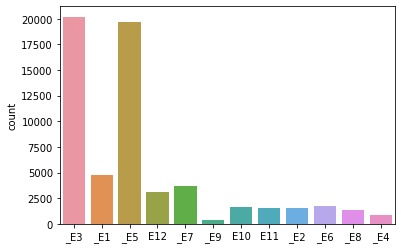

In [28]:
sns.countplot(x=distr)

In [369]:
t_df.to_csv('ranked_variance_results.csv')

In [343]:
test_list = []
for i in cur_file.columns:
    if '.' not in i:
        test_list.append(i)
cur_file[test_list]

,chr11_479164_E1,chr11_479164_E2,chr11_479164_E3,chr11_479164_E4,chr11_479164_E5,chr11_479164_E6,chr11_479164_E7,chr11_479164_E8,chr11_479164_E9,chr11_479164_E10,...,chr11_553562_E3,chr11_553562_E4,chr11_553562_E5,chr11_553562_E6,chr11_553562_E7,chr11_553562_E8,chr11_553562_E9,chr11_553562_E10,chr11_553562_E11,chr11_553562_E12
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
S009W4H1,0.0,0.0,0.0,0.0,0.9996,0.0001,0.0003,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0002,0.1253,0.0000
S0018AH1,0.0,0.0,0.0,0.0,0.9341,0.0633,0.0026,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0000,0.0000,0.0001,0.0000,0.0000,0.0115,0.0000
S001MJH1,0.0,0.0,0.0,0.0,0.7777,0.2219,0.0003,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.9966,0.0033
S005YGH1,0.0,0.0,0.0,0.0,0.9988,0.0009,0.0003,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
S006XEH2,0.0,0.0,0.0,0.0,0.9945,0.0052,0.0003,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S00FWHH1,0.0,0.0,0.0,0.0,0.9996,0.0001,0.0003,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0000
S00C1HH1,0.0,0.0,0.0,0.0,0.9996,0.0001,0.0003,0.0,0.0,0.0,...,0.0006,0.0,0.0,0.0006,0.0000,0.0302,0.0000,0.0000,0.8881,0.0006
S007DDH2,0.0,0.0,0.0,0.0,0.9947,0.0050,0.0003,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0003,0.0000


## Variance Threshold

In [241]:
sample_list = []
final_df = pd.DataFrame()
directory = './blueprint_data/POSTERIOR_Blueprint_release_201608/POSTERIOR_healthy/'
for filename in os.listdir(directory):
    if filename[-3:] != 'txt':
        continue
    else:
        sample_list.append(filename[0:8])
        
final_dict = {}
for i in sample_list:
    final_dict[i] = {}

for filename in os.listdir(directory):
    if filename[-3:] != 'txt':
        continue
    else:
        spl_word = 'chr'
        res = filename.split(spl_word)[-1]
        new_test_string = spl_word+res
        new_spl_word = '_posterior.txt'
        chromo = new_test_string.split(new_spl_word)[0]
        if chromo == 'chrY' or chromo == 'chrX':
            continue
        else:   
            cur_file = pd.read_csv(directory + filename, sep='\t', skiprows=1)
        
            try:
                selector = VarianceThreshold(threshold=0.03)
                selector.fit(cur_file)
                data_transformed = cur_file.loc[:, selector.get_support()]

            except ValueError:
                print("No feature is strong enough to keep")
                continue

            for row in data_transformed.itertuples(name=None):
                win = row[0]
                for i in range(1, len(row)):
                    final_dict[filename[0:8]][chromo + ' win' + str(win) + ' E' + str(i)] = row[i]
            print('done')
            
with open('healthy_chromatin.pkl', 'wb') as f:
        pickle.dump(final_dict, f, pickle.HIGHEST_PROTOCOL)

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
No feature is strong enough to keep
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
No feature is strong enough to keep
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
No feature is strong enough to keep
done
done
done
done
done
done
done
done
done
No feature is strong enough to keep
done
done
done
done
No feature is strong enough to keep
done
done
done
done
done
No feature is strong enough to keep
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
No feature is strong enough to keep
done
done
done
done
done
done
done
done
don

In [ ]:
df = pd.DataFrame()
for i in list(final_dict.keys()):
    var_df = pd.DataFrame(final_dict[i].items())
    var_df = var_df.rename(columns={1: i})
    var_df = var_df.set_index(0)
    
    df = df.merge(var_df, how='outer', left_index=True, right_index=True)
    df = df.transpose()

df['Disease'] = 'Healthy'

In [ ]:
df = pd.DataFrame()
for i in list(final_dict.keys())[0:2]:
    var_df = pd.DataFrame(final_dict[i].items())
    var_df = var_df.rename(columns={1: i})
    var_df = var_df.set_index(0)
    
    df = df.merge(var_df, how='outer', left_index=True, right_index=True)
    df = df.transpose()

df['Disease'] = 'Healthy'

In [205]:
var_thres = []

selector = VarianceThreshold(threshold=0.10)
selector.fit(cur_file)
feature_idx = selector.get_support(indices=True)
var_thres_cpgs = list(cur_file.columns[feature_idx])
# var_thres += list(var_thres_cpgs)

In [213]:
std(cur_file['E1'])**2

1.2674313723700934e-05

In [206]:
#.all(axis=0)
var_thres

['E3']

# Averaging of Genomic Windows


In [104]:
sample_list = []
final_df = pd.DataFrame()
directory = './blueprint_data/POSTERIOR_Blueprint_release_201608/POSTERIOR_healthy_model/'
for filename in os.listdir(directory):
    if filename[-3:] != 'txt':
        continue
    else:
        sample_list.append(filename[0:8])
        
final_dict = {}
for i in sample_list:
    final_dict[i] = {}
        
for filename in os.listdir(directory):
    if filename[-3:] != 'txt':
        continue
    else:
        spl_word = 'chr'
        res = filename.split(spl_word)[-1]
        new_test_string = spl_word+res
        new_spl_word = '_posterior.txt'
        chromo = new_test_string.split(new_spl_word)[0]
        if chromo == 'chrY' or chromo == 'chrX':
            continue
        else:
            cur_file = pd.read_csv(directory + filename, sep='\t', skiprows=1)
#             cur_df = pd.DataFrame(data = {'Sample': [filename[0:8]]})
            s = cur_file.mean(axis = 0)
            for items in s.iteritems():
                final_dict[filename[0:8]][chromo + " " + items[0]] = items[1]
#             final_df = pd.concat([final_df, cur_df])
#             print('File Done')
#             print(final_dict)
# final_df.to_csv('averaged_genomic_window_chromatin_healthy.csv')

In [107]:
df = pd.DataFrame()
for i in list(final_dict.keys()):
    samp_df = pd.DataFrame(final_dict[i].items())
    samp_df = samp_df.rename(columns={1: i})
    samp_df = samp_df.set_index(0)

df = df.merge(samp_df, how='outer', left_index=True, right_index=True)
df = df.transpose()

df['Disease'] = 'Healthy'

In [116]:
healthy_df = healthy_df.transpose()
healthy_models_df= healthy_models_df.transpose()
disease_df = disease_df.transpose()

In [117]:
final_test = healthy_df.merge(healthy_models_df, how='outer', left_index=True, right_index=True)

In [118]:
final_test = final_test.merge(disease_df, how='outer', left_index=True, right_index=True)

In [120]:
final_test = final_test.transpose()

In [187]:
final_test.to_csv('averaged_genomic_window_w_2_extra.csv')

In [271]:
age_file =pd.read_csv('/cellar/users/zkoch/cs_clock_proj/blueprint_data/all_samples_age_pairs_transformed.tsv', sep='\t')

In [272]:
age_file = age_file.set_index('SAMPLE_NAME')

In [276]:
age_file = age_file.rename(columns={'DONOR_AGE': 'Transformed Age'})

In [158]:
test['Age'] = pd.read_csv('/cellar/users/zkoch/cs_clock_proj/blueprint_data/all_samples_age_pairs.tsv', sep='\t')['DONOR_AGE']

In [278]:
final = final.merge(age_file, how='outer', left_index=True, right_index=True)

In [280]:
final = final.drop('Age', axis = 1)

In [282]:
final.to_csv('averaged_genomic_window_dataset.csv')

In [291]:
final

,chr1 E1,chr1 E10,chr1 E11,chr1 E12,chr1 E2,chr1 E3,chr1 E4,chr1 E5,chr1 E6,chr1 E7,...,chrM E3,chrM E4,chrM E5,chrM E6,chrM E7,chrM E8,chrM E9,Disease,DONOR_AGE,Transformed Age
S009W4H1,0.001148,0.000752,0.005406,0.003969,0.008686,0.78432,0.009102,0.050696,0.095841,0.00432,...,0.998429,0.000791,0.0,0.000393,0.0,0.000106,0.0,Healthy,45,1.190476
S0018AH1,0.001588,0.000646,0.005412,0.002627,0.031164,0.788286,0.012996,0.018184,0.105711,0.001413,...,0.000112,0.000105,0.412774,0.56806,0.015367,0.001894,0.000035,Healthy,0,-3.044522
S001MJH1,0.002203,0.000429,0.005048,0.005056,0.027782,0.74446,0.018509,0.036161,0.105491,0.002632,...,0.998429,0.000791,0.0,0.000393,0.0,0.000106,0.0,Healthy,55,1.666667
S005YGH1,0.002048,0.000591,0.006262,0.002119,0.027032,0.791003,0.011393,0.037823,0.094879,0.001755,...,0.998429,0.000791,0.0,0.000393,0.0,0.000106,0.0,Healthy,0,-3.044522
S006XEH2,0.004096,0.000352,0.009492,0.001527,0.021629,0.793861,0.018182,0.026858,0.08986,0.00149,...,0.945489,0.000694,0.0,0.00235,0.0,0.001696,0.0,Healthy,65,2.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S00XUNH1,0.003345,0.00454,0.006708,0.004637,0.019199,0.730898,0.006841,0.082082,0.084979,0.010216,...,0.927884,0.002923,0.000002,0.003229,0.000106,0.001294,0.002215,Disease,65,2.142857
S01FF6H1,0.005084,0.00992,0.002613,0.003761,0.069984,0.661251,0.03956,0.074216,0.07371,0.020999,...,0.932216,0.002895,0.0,0.002124,0.000001,0.000733,0.000005,Disease,65,2.142857
S00CYPH1,0.000335,0.000097,0.005847,0.001131,0.02015,0.759914,0.012099,0.06646,0.110879,0.001635,...,0.000726,0.000001,0.0,0.000959,0.000005,0.007526,0.000028,Disease,35,0.714286
S005DLH1,0.002482,0.000343,0.005141,0.008012,0.033916,0.733349,0.016406,0.007749,0.120965,0.001416,...,0.89163,0.04449,0.0,0.001133,0.0,0.000717,0.000004,Disease,65,2.142857


-0.002154491550641158
0.01811132971419298


In [ ]:
pd.read_csv('/cellar/users/zkoch/cs_clock_proj/scripts/output/chrom_1.tsv', na_filter=False, low_memory=False)

In [5]:
test = pd.read_csv('C000S5H1_12_12_Blueprint_release_201608_chr12_posterior.txt', sep = '\t')

In [21]:
df = pd.read_csv("./blueprint_data/POSTERIOR_Blueprint_release_201608/POSTERIOR_healthy/C00280H1_12_12_Blueprint_release_201608_chr1_posterior.txt", sep='\t', skiprows=1)